# Метод Пиявского

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import time
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [92]:
# read function from file
# with open('function.txt') as f:
#     lines = f.readlines()
    
# f = lambda x: eval(lines[0])

In [138]:
f = lambda x: (x**2 - 4)**2 +(x**3+3) + (x - 4)**2
# f = lambda x: 0.5 * x + 0.2 * np.cos(3.14 * x) + 0.2 * np.sin(2 * 3.14 * x)
interval = [-2.9, 2.4]
# interval = [-2, 1]

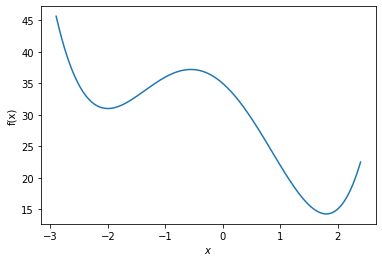

In [139]:
partition = np.linspace(interval[0], interval[1], 1000)

plt.plot(partition, f(partition))
plt.xlabel('$x$')
plt.ylabel('f(x)')

plt.show()

### Константа Липшица

In [140]:
def estimate_L(f, h, partition):
    return 2 * np.max(np.abs(f(partition[:-1]) - f(partition[1:]))/h)
h = (partition[1:] - partition[:-1])[0]
L = estimate_L(f, h, partition)
L

79.08377157733989

### Поиск глоб. экстремума

In [141]:
u0, u1  = interval[0],interval[1]
p0 = g0 = f(u0) - L * np.abs(partition - u0)
g1 = f(u1) - L * np.abs(partition - u1)
p1 = np.maximum(p0, g1)

In [142]:
p_arr = [p1]

for iter in range(1000):
    u = partition[np.argmin(p_arr[-1])]
    g = f(u) - L * np.abs(partition - u)
    
    p = np.maximum(p_arr[-1], g)
    p_arr.append(p)
u

1.805805805805806

### Напишем удобную функцию поиска

In [143]:
def find_global_extremum(f, interval, eps, iterations):
    st = time.time()
    partition = np.linspace(interval[0], interval[1], 1000)
    h = (partition[1:] - partition[:-1])[0]
    L = estimate_L(f, h, partition)
    
    #step 0 and 1
    u0 = interval[0]
    u1 = interval[1]
    g0 = f(u0) - L * np.abs(partition - u0)
    p0 = g0
    g1 = f(u1) - L * np.abs(partition - u1)
    p1 = np.maximum(p0, g1)
    
    p_arr = [p1]
    u_old = u1
    u_arr = [u_old]
    

    for iter in range(iterations):
        u = partition[np.argmin(p_arr[-1])]
        g = f(u) - L * np.abs(partition - u)
        
        p = np.maximum(p_arr[-1], g)
        p_arr.append(p)
        u_arr.append(u)
        
        if np.abs(u - u_old) < eps:
            break
        
        u_old = u
        
    et = time.time()
        
    return u, p_arr, u_arr, iter, partition, et-st

In [144]:
# f = lambda x: (x**2 - 8)**2 + (x - 4)**2
# interval = [-3, 3.2]
iters = 1000
epsilon = 1e-5

u, p_arr, u_arr, iter_, partition, time_compl = find_global_extremum(f, interval, epsilon, iters)

In [145]:
u

1.805805805805806

In [146]:
## num iterations
iter_

96

## Изобразим процесс

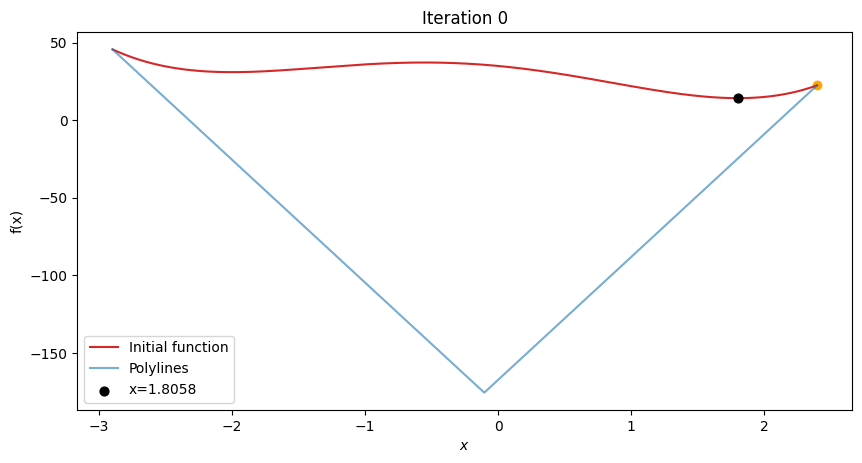

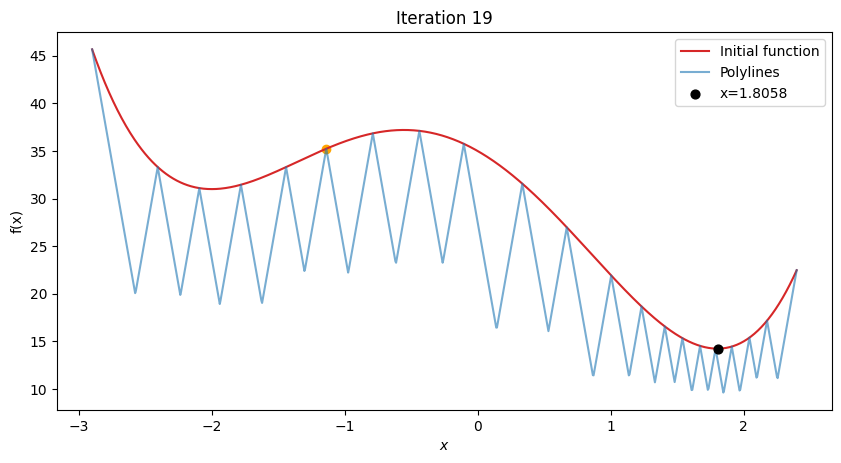

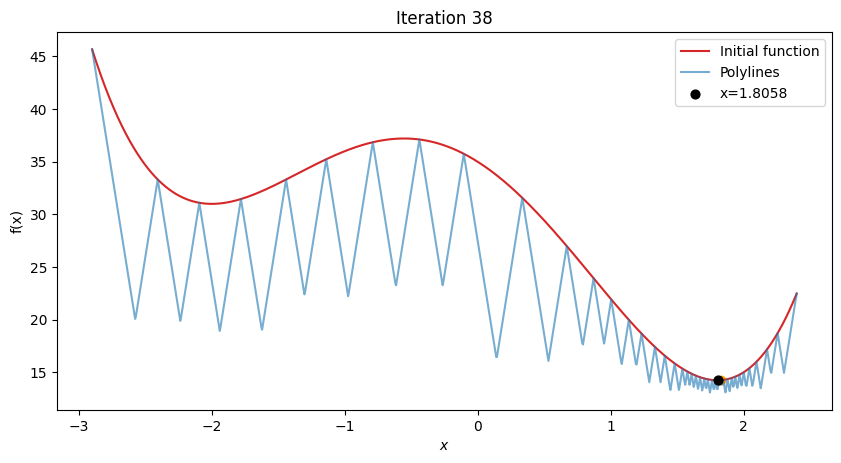

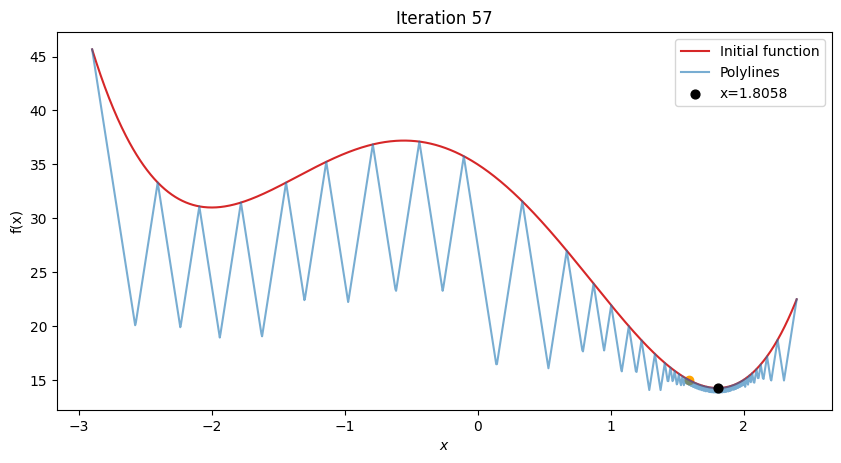

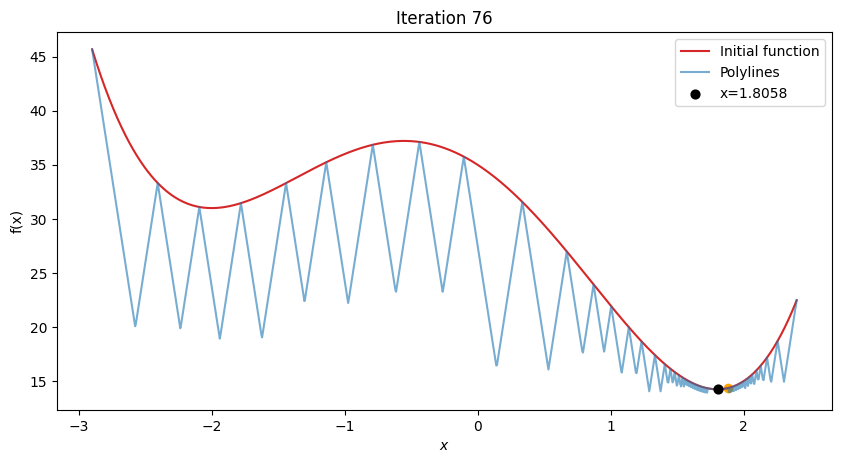

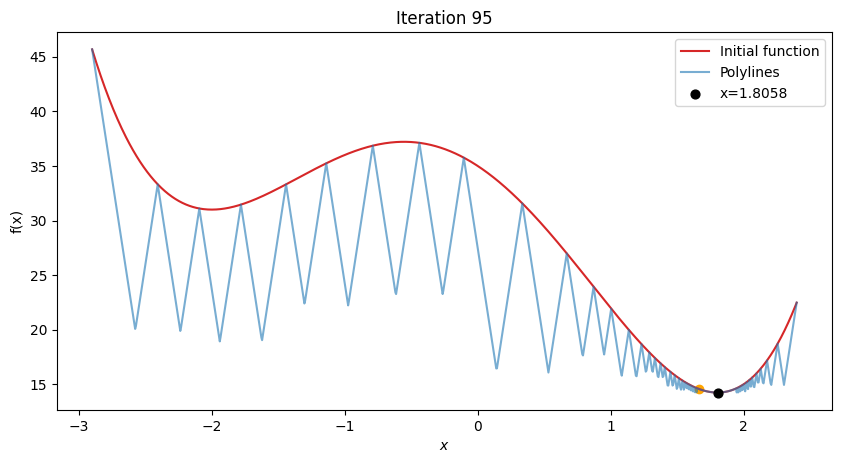

In [147]:
for i in range(0, iter_, iter_//5): 
    plt.subplots(figsize=(10, 5), dpi=100)

    plt.plot(partition, f(partition), color='tab:red', label='Initial function')
    plt.plot(partition, p_arr[i], color='tab:blue', label='Polylines', alpha=0.6)
    plt.scatter(u_arr[i], f(u_arr[i]), color='orange', zorder=2)
    plt.scatter(u, f(u), zorder=3, color='black', s=40, label=f'x={round(u, 4)}')

    plt.title(f'Iteration {i}')
    plt.xlabel('$x$')
    plt.ylabel('f(x)')
    plt.legend()
plt.show()

### Сравнение с готовым решением оптимизации - моедулем scipy.minimize

In [152]:
from scipy.optimize import minimize

st = time.time()
res=minimize(f, x0=interval[0], bounds=[(interval[0], interval[1])])

scipy_res = res.x[0]
niter_scipy = res.nit
et = time.time()

In [153]:
pd.DataFrame([[u, scipy_res], 
              [str(int(iter_)), 
               str(int(niter_scipy))], 
              [time_compl, et-st]], 
             columns=['Метод Пиявского', 'Scipy'], 
             index=['Результат', 'num_iterations', 'Exec. time']).T




,Результат,num_iterations,Exec. time
Метод Пиявского,1.805806,96,0.003985
Scipy,1.804248,6,0.004864
